In [6]:
import matplotlib.pyplot as plt
import pandas as pd

In [7]:
from Google import Create_Service
CLIENT_SECRET_FILE = 'credentials-sheets.json'
API_NAME = 'drive'
API_VERSION = 'v3'
SCOPES = ['https://www.googleapis.com/auth/drive']

service = Create_Service(CLIENT_SECRET_FILE, API_NAME, API_VERSION, SCOPES)
SheetService = Create_Service(CLIENT_SECRET_FILE, 'sheets', 'v4', ['https://www.googleapis.com/auth/spreadsheets.readonly'])

response = SheetService.spreadsheets().get(
                spreadsheetId = '1-2avVB6DpNVGzAv5QtAyUOIaWTlWwUPxHf5y3ktogiE'
            ).execute()
SET100 = SheetService.spreadsheets().values().get(
                    spreadsheetId = '1-2avVB6DpNVGzAv5QtAyUOIaWTlWwUPxHf5y3ktogiE' ,
                    majorDimension = 'ROWS',
                    range = 'Graph!A1:F'+str(response['sheets'][2]['properties']['gridProperties']['rowCount'])
                    
                ).execute()

Set_100 = pd.DataFrame(SET100['values'][1:],columns=SET100['values'][0])
Set_100 = Set_100.dropna()
for i in range(0,len(Set_100)) :
    Set_100['PCT Change SET100'].iloc[i] = Set_100['PCT Change SET100'].iloc[i].replace('%','')
    Set_100['PCT Change Winner SET100'].iloc[i] = Set_100['PCT Change Winner SET100'].iloc[i].replace('%','')
    Set_100['Percent Capital'].iloc[i] = Set_100['Percent Capital'].iloc[i].replace('%','')
Set_100['PCT Change SET100'] = Set_100['PCT Change SET100'].astype('float')
Set_100['PCT Change Winner SET100'] = Set_100['PCT Change Winner SET100'].astype('float')
Set_100['Percent Capital']= Set_100['Percent Capital'].astype('float')

credentials-sheets.json-drive-v3-(['https://www.googleapis.com/auth/drive'],)
['https://www.googleapis.com/auth/drive']
drive service created successfully
credentials-sheets.json-sheets-v4-(['https://www.googleapis.com/auth/spreadsheets.readonly'],)
['https://www.googleapis.com/auth/spreadsheets.readonly']
sheets service created successfully


C:\Users\James_Sci_Stat_TU_62\AppData\Local\Temp\ipykernel_25016\47131260.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(temp_date,rotation=90)


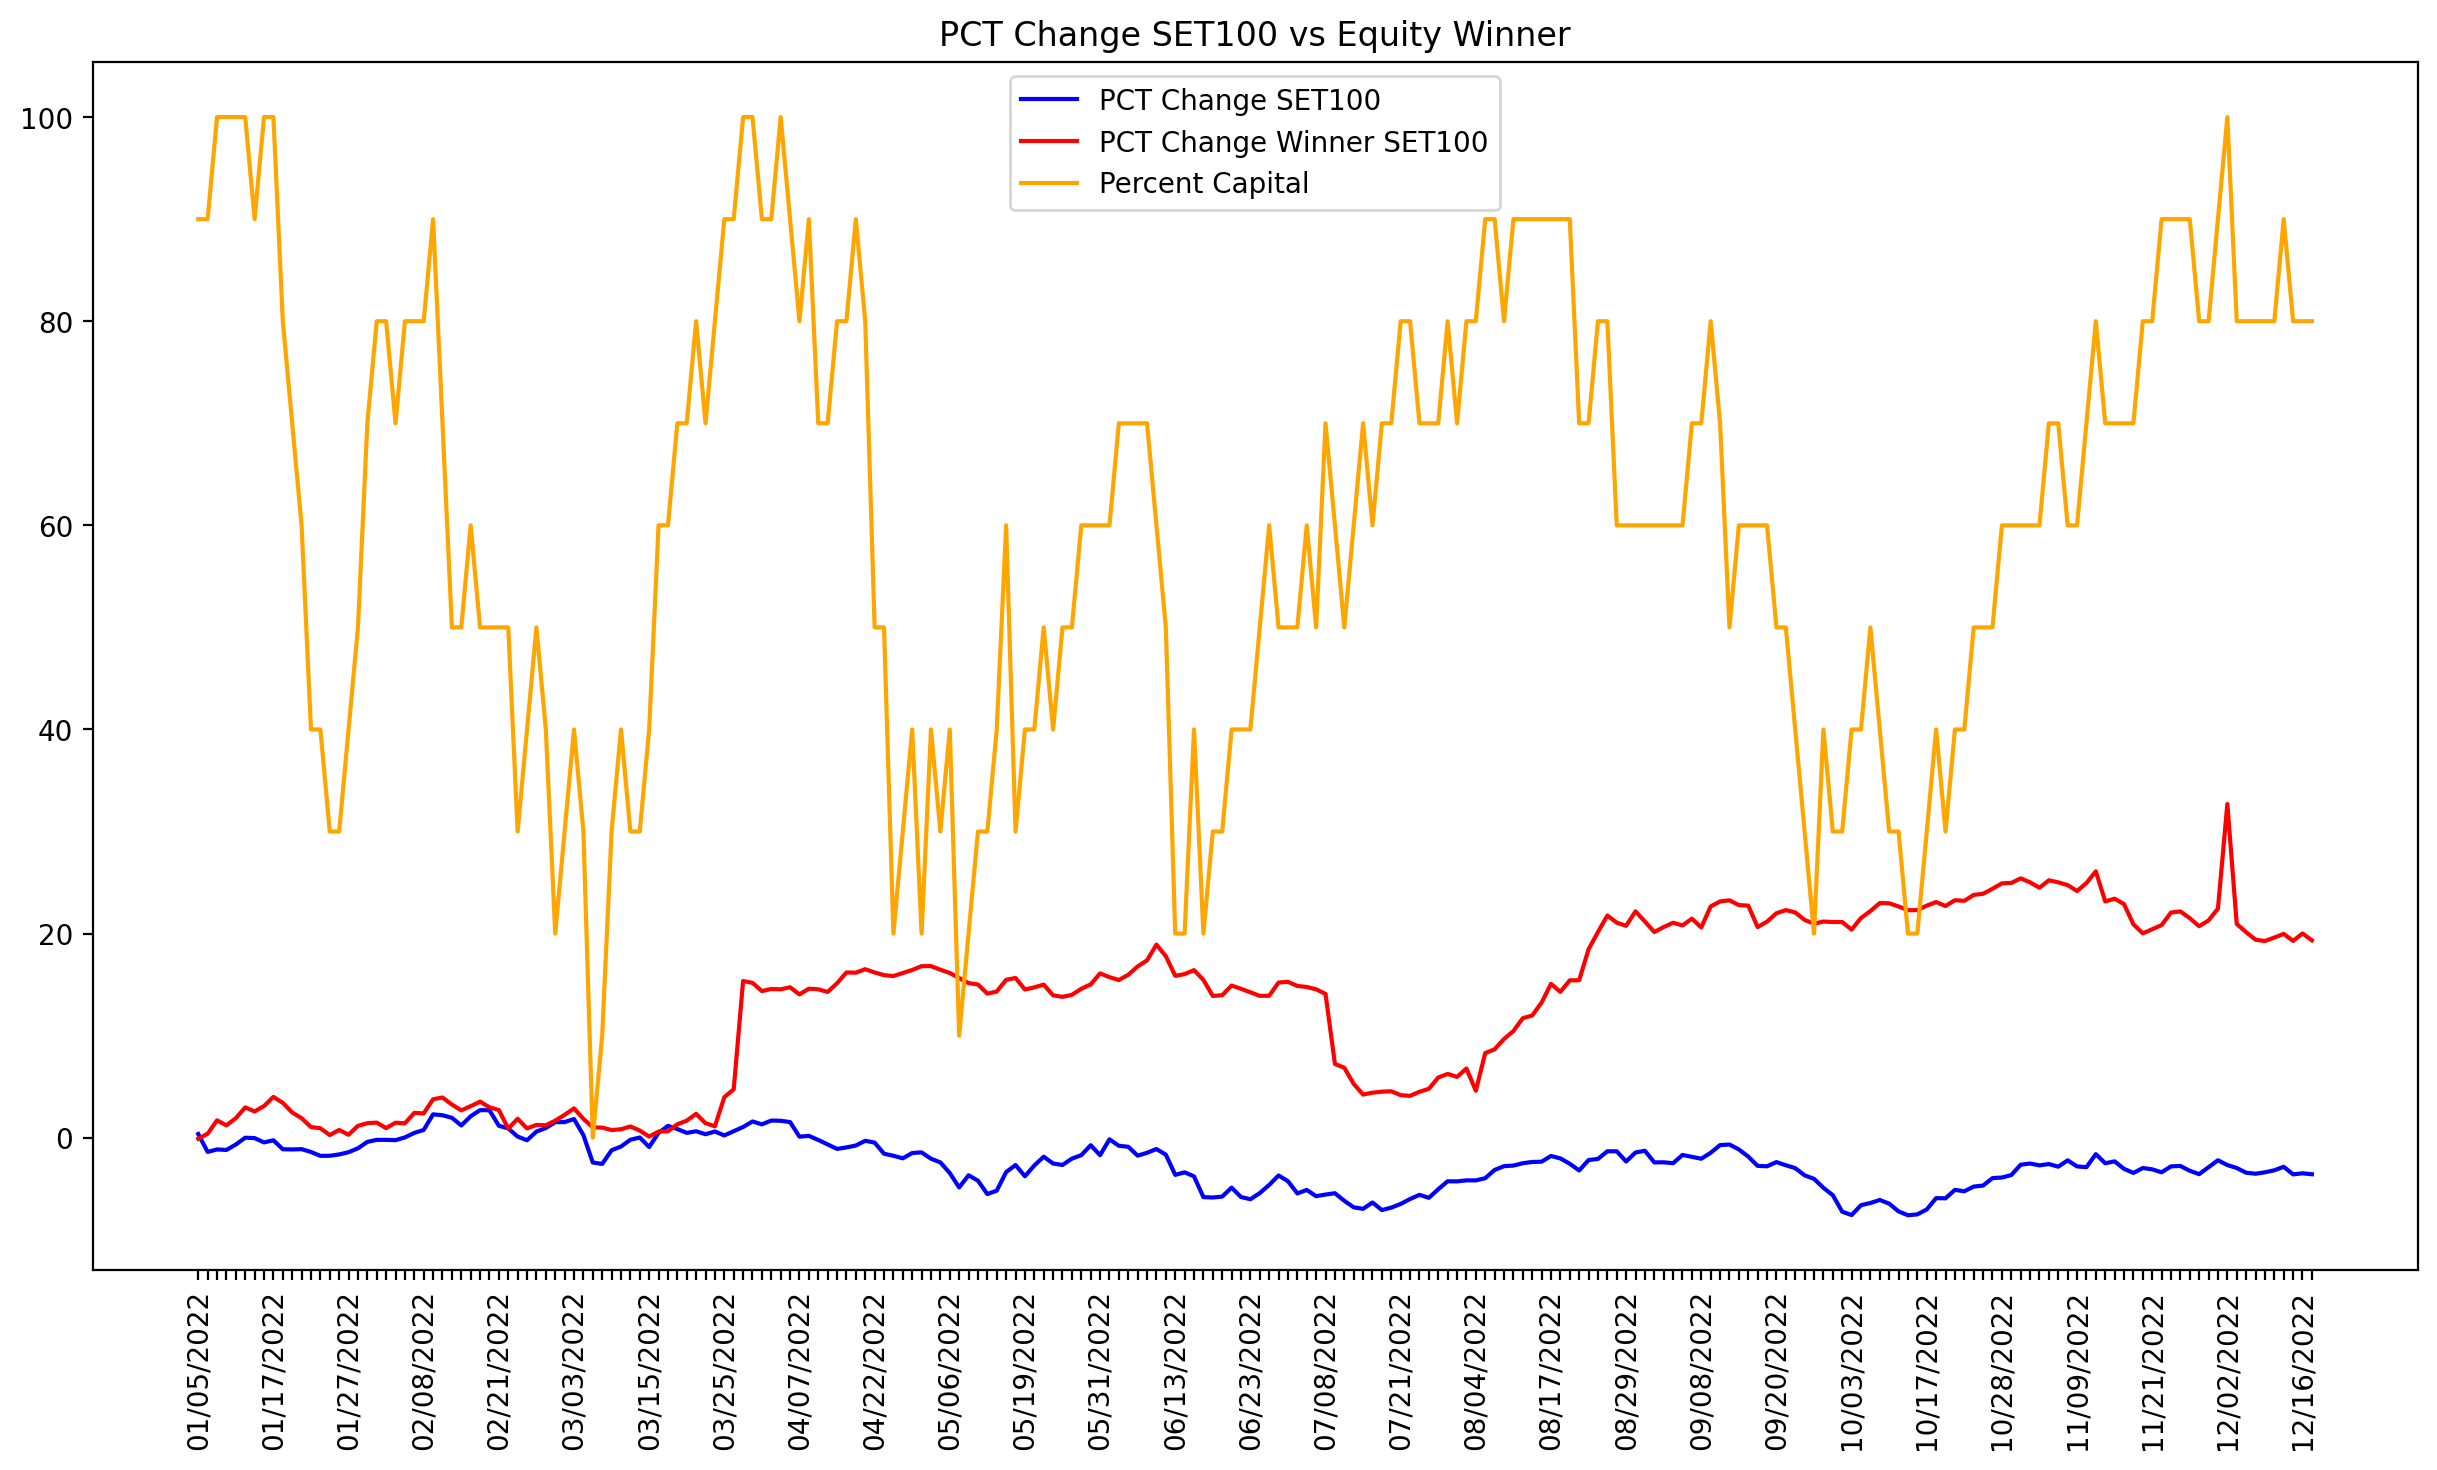

In [8]:
path = 'img'
temp_date = []
k=0
for i in Set_100['Time'] :
    if k%8 == 0 :
        temp_date.append(i)
    else :
        temp_date.append('')
    k+=1
fig = plt.figure(figsize=(15,8),dpi=200)
ax = fig.add_subplot()
plt.plot(Set_100['Time'],Set_100['PCT Change SET100'],label='PCT Change SET100',color='blue')
plt.plot(Set_100['Time'],Set_100['PCT Change Winner SET100'],label='PCT Change Winner SET100',color='red')
plt.plot(Set_100['Time'],Set_100['Percent Capital'],label='Percent Capital',color='orange')
plt.title('PCT Change SET100 vs Equity Winner')
ax.set_xticklabels(temp_date,rotation=90)
plt.legend()
plt.savefig(f'{path}/winner_SET100.jpg')
plt.show()

In [9]:
import json
month = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
temp1= Set_100['Time'].iloc[-1].split('/')
temp2= Set_100['Time'].iloc[-2].split('/')
Today = temp1[1]+' '+month[int(temp1[0])-1]+' '+temp1[2]
Yesterday = temp2[1]+' '+month[int(temp2[0])-1]+' '+temp2[2]
# สร้าง Python Dict สตริงขึ้นมาพื่อทดสอบ
prog_dict = {
    'Today_date':Today,
    'Today_per':str(Set_100['Percent Capital'].iloc[-1]),
    'Today_dif':str(Set_100['Percent Capital'].iloc[-1]-Set_100['Percent Capital'].iloc[-2])
}

with open('Winner_SET100.json', 'w') as json_file:
    json.dump(prog_dict, json_file)

In [9]:
len(Change)

226

In [11]:
len(Time)

226